### Treść zadania

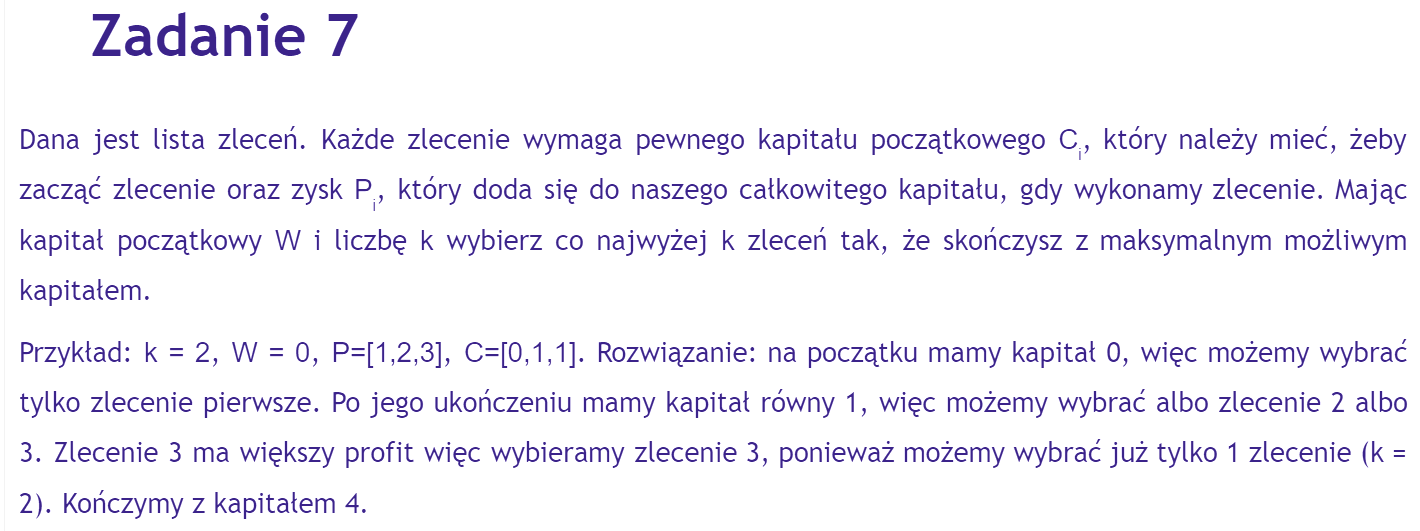

### Złożoność

##### Implementacja #1
###### Obliczeniowa
$ O(n \cdot log(n)) $, gdzie $ n $ - liczba zleceń (potencjalnie pierwsze zlecenie, jakie wykonamy, może nam odblokować wszystkie pozostałe zlecenia, więc $ n - 1 $ zleceń będziemy wrzucać do kopca $ available\_heap $.
###### Pamięciowa
$ O(n) $
##### Implementacja #2
###### Obliczeniowa
$ O(n \cdot log(n)) $ - wynika to stąd, że możemy mieć każde zlecenie o innym wymaganym kapitale, przez co, będziemy mieli kopiec $ n $ kopców 1-elementowych, więc złożoność jest taka sama jak wyżej.
###### Pamięciowa
$ O(n) $

### Implementacja
##### Dwa kopce - Min Heap i Max Heap

In [1]:
import operator


class Heap:
    def __init__(self, values, operator):
        self.op = operator
        if values:
            self.heap = list(values) # We make a copy of values in order not to modify them
            self.build_heap()
        else:
            self.heap = []
    
    def __len__(self):
        return self.heap_size
    
    @property
    def heap_size(self):
        return len(self.heap)
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        # Add a value as the last node of our Complete Binary Tree
        self.heap.append(val)
        # Fix heap in order to satisfy a min-heap property
        self._heapify_up(self.heap_size - 1)
        
    def _get_root(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def _remove_root(self) -> object:
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last = self.heap.pop()
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a min-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def _swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.op(self.heap[curr_idx], self.heap[parent_idx]):
                self._swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            smallest_idx = curr_idx

            if l < end_idx:
                if self.op(self.heap[l], self.heap[curr_idx]): 
                    smallest_idx = l
                if r < end_idx and self.op(self.heap[r], self.heap[smallest_idx]):
                    smallest_idx = r
        
            if smallest_idx != curr_idx:
                self._swap(curr_idx, smallest_idx)
                curr_idx = smallest_idx
            else:
                break
        
    def build_heap(self):
        for i in range(self.heap_size // 2 - 1, -1, -1):
            self._heapify_down(i, self.heap_size)
            
            
class MinHeap(Heap):
    def __init__(self, values=None):
        super().__init__(values, operator.lt)
        
    def get_min(self):
        return self._get_root()
        
    def remove_min(self):
        if self.heap_size == 0:
            raise IndexError(f'remove_min from an empty {self.__class__.__name__}')
        return self._remove_root()
    
    
class MaxHeap(Heap):
    def __init__(self, values=None):
        super().__init__(values, operator.gt)
        
    def get_max(self):
        return self._get_root()
        
    def remove_max(self):
        if self.heap_size == 0:
            raise IndexError(f'remove_max from an empty {self.__class__.__name__}')
        return self._remove_root()
    
    
def max_profit(C: 'array of costs',
               P: 'array of profits',
               W: 'initial amount of money',
               k: 'max number of jobs'):
    n = len(P)
    awaiting_heap  = MinHeap([(C[i], P[i]) for i in range(n)])
    available_heap = MaxHeap()
    max_profit = W
    
    for _ in range(k):
        # Add all available jobs to the Max Heap of available jobs
        while awaiting_heap and max_profit >= awaiting_heap.get_min()[0]:
            p = awaiting_heap.remove_min()[1]
            # Insert only profit as cost doesn't intrest us since we have enough 
            # money to unlock such a job
            available_heap.insert(p)
        # If there is no job available, break the loop
        if not available_heap: break
        # Else, choose the most profitable job of jobs available
        max_profit += available_heap.remove_max()
        
    return max_profit

###### Kilka testów

In [2]:
C = [0, 1, 1]
P = [1, 2, 3]
W = 0
k = 2

print(max_profit(C, P, W, k))

4


### Implementacja #2
##### Sortowanie + kopiec kopców (Max Heap)

In [3]:
class MaxHeap:
    def __init__(self, values=None):
        if values:
            self.heap = list(values) # We make a copy of values in order not to modify them
            self.build_heap()
        else:
            self.heap = []
        
    def __str__(self):  # A 'complete_tree_string' function is required in order to ensure that printing works
        return complete_tree_string(self.heap)
    
    def __bool__(self):
        return bool(self.heap)
    
    @property
    def heap_size(self):
        return len(self.heap)
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        # Add a value as the last node of out Complete Binary Tree
        self.heap.append(val)
        # Fix heap in order to satisfy a max-heap property
        self._heapify_up(self.heap_size - 1)
        
    def get_max(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def remove_max(self) -> object:
        if self.heap_size == 0:
            raise IndexError(f'remove_max from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last = self.heap.pop()
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a max-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):  # O(log n)
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx] > self.heap[parent_idx]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):  # O(log n)
        # Loop till the current node has a child larger than itself
        # We assume that when we enter a node which both children are
        # smaller than this node, a subtree which a current node is a
        # root of must fulfill a max-heap property
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            largest_idx = curr_idx

            if l < end_idx:
                if self.heap[l] > self.heap[curr_idx]: 
                    largest_idx = l
                if r < end_idx and self.heap[r] > self.heap[largest_idx]:
                    largest_idx = r

            if largest_idx != curr_idx:
                self.swap(curr_idx, largest_idx)
                curr_idx = largest_idx
            else:
                break
        
    def build_heap(self):   # O (n)
        for i in range(self.heap_size // 2 - 1, -1, -1):
            self._heapify_down(i, self.heap_size)
            
            
def quick_sort(arr, *, fn=lambda x: x):
    _quick_sort(arr, 0, len(arr) - 1, fn)
    

def _quick_sort(arr, left_idx, right_idx, fn):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx, fn)

        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position - 1, fn)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx, fn)
            right_idx = pivot_position - 1
        
        
def _partition(arr, left_idx, right_idx, fn):
    pivot = fn(arr[right_idx])
    
    # Partition an array into 2 subarrays of elements lower than
    # pivot and of elements greater than a pivot
    i = left_idx
    for j in range(left_idx, right_idx):
        if fn(arr[j]) < pivot:
            _swap(arr, i, j)
            i += 1
    
    # Place a pivot element on its destination index
    _swap(arr, i, right_idx)
    
    return i  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

            
def max_profit(C: 'array of costs',
               P: 'array of profits',
               W: 'initial amount of money',
               k: 'max number of jobs'):
    n = len(P)
    max_profit = W
    # Create array of cost-profit pairs
    CP = [(C[i], P[i]) for i in range(n)]
    # Sort this array by cost in order to have elements of the same
    # cost one near to another
    quick_sort(CP, fn=lambda cp: cp[0])
    # Build max heaps for each cost
    heaps = [(CP[0][0], MaxHeap([CP[0][1]]))]
    for i in range(1, n):
        if CP[i][0] == CP[i - 1][0]:
            heaps[-1][1].insert(CP[i][1])
        else:
            heaps.append((CP[i][0], MaxHeap([CP[i][1]])))
    # As we have all heaps sorted by the cost required, we can easily decide which
    # heaps to consider in a particular moment. In order to choose always the best
    # value and make the least checks, we can use another Max Heap to in which we
    # will store currently available jobs.
    jobs = MaxHeap()
    heaps.append((float('inf'), None))  # Add the sentinel value
    i = 0
    for _ in range(k):
        while max_profit >= heaps[i][0]:
            jobs.insert((heaps[i][1].get_max(), heaps[i][1]))
            i += 1
        # If no jobs remaining, break the loop
        if not jobs: break
        best_heap = jobs.remove_max()[1]
        best_profit = best_heap.remove_max()
        max_profit += best_profit
        # If there are still some values remaining in a heap, add it again to the
        # jobs heap
        if best_heap:
            jobs.insert((best_heap.get_max(), best_heap))
    
    return max_profit

###### Kilka testów

In [4]:
C = [0, 1, 1]
P = [1, 2, 3]
W = 0
k = 123

print(max_profit(C, P, W, k))

6
